In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!unzip  'archive (2).zip' -d /content/

Archive:  archive (2).zip
  inflating: /content/diabetes.csv   


In [26]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
# Separate features and labels
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [83]:
X_labeled, X_unlabeled, y_labeled, y_true_unlabeled = train_test_split(
    X_scaled, y, test_size=0.1, stratify=y, random_state=42
)

In [84]:
print(len(X_labeled))


691


In [85]:
len(X_unlabeled)

77

In [86]:
X_labeled_0 = X_labeled[y_labeled == 0]
X_labeled_1 = X_labeled[y_labeled == 1]

In [87]:
# Define number of clusters per class (can be tuned)
# k = 3

# Cluster class 0
kmeans_0 = KMeans(n_clusters=2, random_state=42)
kmeans_0.fit(X_labeled_0)
centroids_0 = kmeans_0.cluster_centers_

# Cluster class 1
kmeans_1 = KMeans(n_clusters=6, random_state=42)
kmeans_1.fit(X_labeled_1)
centroids_1 = kmeans_1.cluster_centers_


In [88]:
# Output cluster centers for inspection
print("Centroids for Non-diabetic (Class 0):")
print(centroids_0)

print("\nCentroids for Diabetic (Class 1):")
print(centroids_1)



Centroids for Non-diabetic (Class 0):
[[ 0.8255513  -0.08667842  0.41338005 -0.33847016 -0.34001226 -0.15681468
  -0.15190646  1.09760986]
 [-0.53500701 -0.45118811 -0.2048581   0.06336322 -0.03460841 -0.23094185
  -0.10560257 -0.65812605]]

Centroids for Diabetic (Class 1):
[[ 1.49902881  0.54038224  0.44782599  0.82437927  0.26843005  0.32798568
   0.38808132  0.9853624 ]
 [-0.60919738  0.42705428  0.18902951  0.71609869  0.3198383   0.6178098
  -0.05446794 -0.34464022]
 [-0.43655617  0.79224974  0.20995479  0.6798807   0.58856015  0.48535043
   2.35103262  0.01850215]
 [ 0.16150129  1.46035686  0.02326848  0.85499654  3.27856955  0.35279033
  -0.04861945  0.44275915]
 [ 0.48038319  0.65119849  0.39269734 -1.23765527 -0.69289057  0.2047705
  -0.23767488  0.6005172 ]
 [ 0.20591935  0.5835018  -3.57259724 -1.14345515 -0.69289057  0.08685654
  -0.10370435 -0.05322246]]


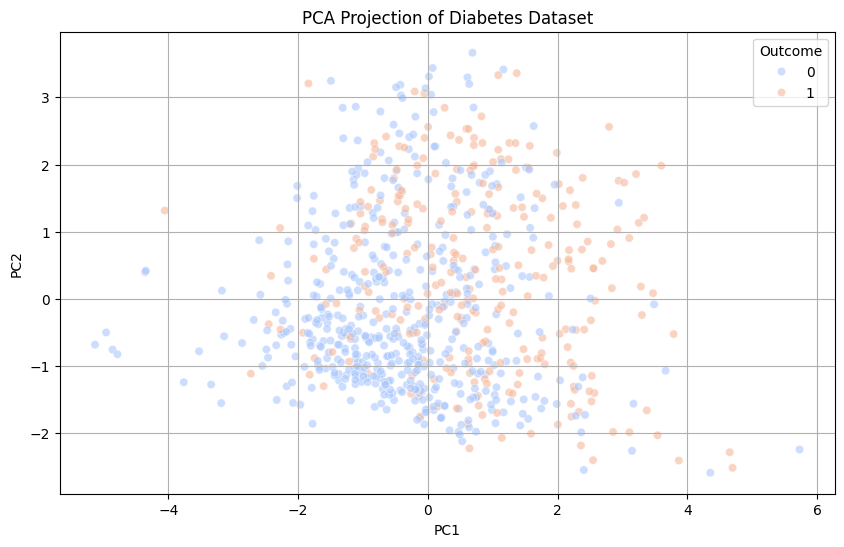

In [89]:
# Optional: visualize using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', alpha=0.6)
plt.title("PCA Projection of Diabetes Dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

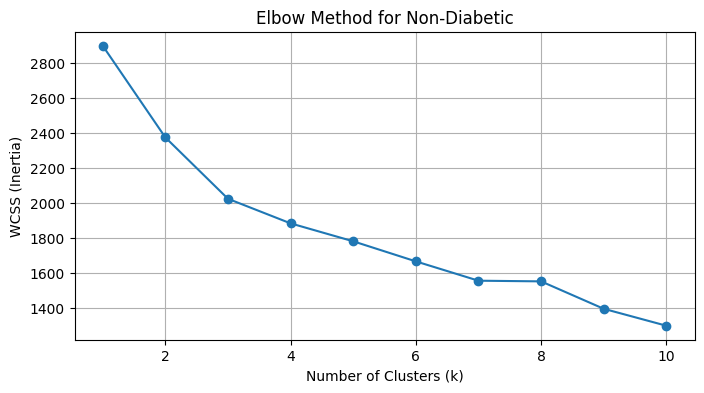

In [90]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def elbow_method(X, max_k=10, label="Class"):
    wcss = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

    plt.figure(figsize=(8, 4))
    plt.plot(range(1, max_k+1), wcss, marker='o')
    plt.title(f'Elbow Method for {label}')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS (Inertia)')
    plt.grid(True)
    plt.show()

# Call for each class separately
elbow_method(X_labeled_0, label="Non-Diabetic")


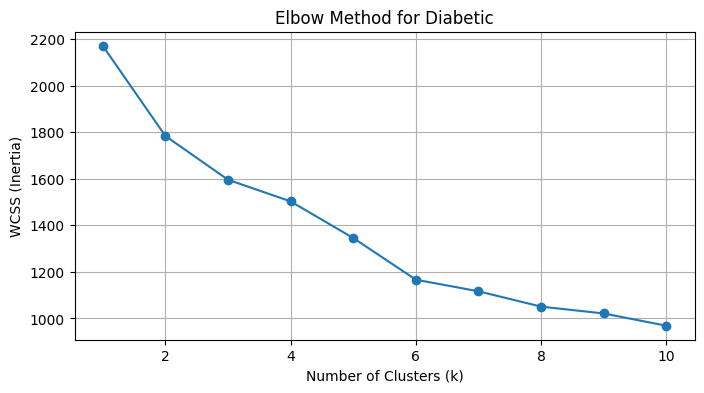

In [91]:
elbow_method(X_labeled_1, label="Diabetic")


In [92]:
from sklearn.metrics import silhouette_score

def best_k_silhouette(X, max_k=10, label="Class"):
    best_score = -1
    best_k = 2
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        preds = kmeans.fit_predict(X)
        score = silhouette_score(X, preds)
        print(f"{label} - K={k}, Silhouette Score={score:.4f}")
        if score > best_score:
            best_score = score
            best_k = k
    print(f"\nBest K for {label} based on Silhouette: {best_k}")

# Call for each class
best_k_silhouette(X_labeled_0, label="Non-Diabetic")


Non-Diabetic - K=2, Silhouette Score=0.2293
Non-Diabetic - K=3, Silhouette Score=0.1745
Non-Diabetic - K=4, Silhouette Score=0.1335
Non-Diabetic - K=5, Silhouette Score=0.1190
Non-Diabetic - K=6, Silhouette Score=0.1268
Non-Diabetic - K=7, Silhouette Score=0.1492
Non-Diabetic - K=8, Silhouette Score=0.1270
Non-Diabetic - K=9, Silhouette Score=0.1484
Non-Diabetic - K=10, Silhouette Score=0.1412

Best K for Non-Diabetic based on Silhouette: 2


In [93]:
best_k_silhouette(X_labeled_1, label="Diabetic")


Diabetic - K=2, Silhouette Score=0.1673
Diabetic - K=3, Silhouette Score=0.1524
Diabetic - K=4, Silhouette Score=0.1365
Diabetic - K=5, Silhouette Score=0.1488
Diabetic - K=6, Silhouette Score=0.1862
Diabetic - K=7, Silhouette Score=0.1603
Diabetic - K=8, Silhouette Score=0.1487
Diabetic - K=9, Silhouette Score=0.1407
Diabetic - K=10, Silhouette Score=0.1459

Best K for Diabetic based on Silhouette: 6


Clustering Unlabelled data

In [94]:
import numpy as np
from sklearn.metrics import pairwise_distances_argmin

# Step 1: Combine centroids and their corresponding class labels
# Label 0: Non-diabetic → 3 clusters
centroids_with_labels_0 = [(centroid, 0) for centroid in kmeans_0.cluster_centers_]

# Label 1: Diabetic → 6 clusters
centroids_with_labels_1 = [(centroid, 1) for centroid in kmeans_1.cluster_centers_]

# Combine all centroids
all_centroids = centroids_with_labels_0 + centroids_with_labels_1

# Extract only centroid vectors
centroid_vectors = np.array([c[0] for c in all_centroids])
centroid_labels = np.array([c[1] for c in all_centroids])

In [95]:
kmeans_0

KMeans(n_clusters=2, random_state=42)

In [96]:
kmeans_1

KMeans(n_clusters=6, random_state=42)

In [97]:
# === Example unlabeled data ===
# In real scenario, this comes from separate source. Here, simulate by hiding some labels.
# Let's randomly mask 30% of labels as 'unknown'
# np.random.seed(42)
# mask = np.random.rand(len(y)) < 0.5

# X_unlabeled = X_scaled[mask]
# X_labeled = X_scaled[~mask]
# y_labeled = y[~mask]  # keep these for later training

# Step 2: Assign pseudo-labels using nearest centroid
closest_centroids = pairwise_distances_argmin(X_unlabeled, centroid_vectors)
pseudo_labels = centroid_labels[closest_centroids]

# Optional: Preview pseudo-label distribution
from collections import Counter
print("Pseudo-label distribution:")
print(Counter(pseudo_labels))

# Step 3: Merge with original labeled data
X_combined = np.vstack((X_labeled, X_unlabeled))
y_combined = np.hstack((y_labeled, pseudo_labels))

print(f"\nNew dataset size after pseudo-labeling: {X_combined.shape[0]} samples")

# Now you can train any classifier on (X_combined, y_combined)

Pseudo-label distribution:
Counter({np.int64(1): 52, np.int64(0): 25})

New dataset size after pseudo-labeling: 768 samples


Classification Report:

              precision    recall  f1-score   support

           0     0.7980    0.8316    0.8144        95
           1     0.7091    0.6610    0.6842        59

    accuracy                         0.7662       154
   macro avg     0.7535    0.7463    0.7493       154
weighted avg     0.7639    0.7662    0.7645       154

Accuracy Score: 0.7662337662337663


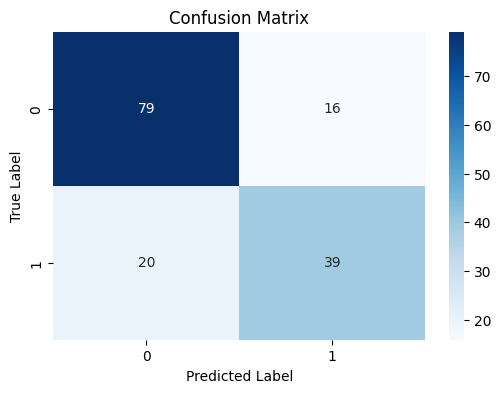

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Train-Test Split on Combined Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y_combined, test_size=0.2, random_state=42, stratify=y_combined
)

# Step 2: Train Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 3: Predict and Evaluate
y_pred = clf.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Step 4: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
